In [53]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import os
import sys

In [54]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [55]:
from imp import reload
import read_annotations
reload(read_annotations);

### Find files to compare

Find pairs of files annotated for more than one annotator.

In [16]:
document_pairs, all_files = read_annotations.get_annotated_documents()
all_files.values()

dict_values([Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: M, Case: ALKASI v. TURKEY - Ann: C])

In [17]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [18]:
STYLES = {'claim': '__', 'major-claim': '***', 'premise': '`'}

In [19]:
print(document_pairs[0][0].identifier)
printmd(document_pairs[0][0].sample_labeled_text(limit=35, styles=STYLES))
printmd('---')
print(document_pairs[0][1].identifier)
printmd(document_pairs[0][1].sample_labeled_text(limit=35, styles=STYLES))

Case: ALKASI v. TURKEY - Ann: L


`Relying` `on` `Article` `6` `of` `the` `Convention` , the applicant complains that ***the*** ***labour*** ***court*** ***’*** ***s*** ***dismissal*** ***of*** ***her*** ***claim*** ***for*** ***compensation*** ***against*** ***her*** ***former*** ***employer*** ***amounted*** ***to*** ***a*** ***violation*** ***of*** ***her*** ***right*** ***to*** ***be*** ***presumed*** ***innocent*** , in that `the` `labour` `court` `found` `that` `she` `had` `broken` `her` `employer` `’` `s` `trust` `by` `committing` `the` offence `of` `incitement` . 

The applicant argues that __the__ __labour__ __court__ __’__ __s__ __complete__ __disregard__ __of__ __her__ __acquittal__ __in__ __relation__ __to__ __the__ __charge__ __of__ __incitement__ __is__ __incompatible__ __with__ __the__ __requirements__ __of__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that __the__ __applicant__ __’__ __s__ __grievances__ __fall__ __to__ __be__ __examined__ __solely__ __under__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ __which__ __reads__ __as__ __follows__ __:__ 



---

Case: ALKASI v. TURKEY - Ann: M


Relying on `Article` `6` `of` `the` `Convention` , the applicant complains that __the__ __labour__ __court__ __’__ __s__ __dismissal__ __of__ __her__ __claim__ __for__ __compensation__ __against__ __her__ __former__ __employer__ __amounted__ __to__ __a__ __violation__ __of__ __her__ __right__ __to__ __be__ __presumed__ __innocent__ , in that `the` `labour` `court` `found` `that` `she` `had` `broken` `her` `employer` `’` `s` `trust` `by` `committing` `the` offence `of` `incitement` . 

The applicant argues that ***the*** ***labour*** ***court*** ***’*** ***s*** ***complete*** ***disregard*** ***of*** ***her*** ***acquittal*** ***in*** ***relation*** ***to*** ***the*** ***charge*** ***of*** ***incitement*** ***is*** ***incompatible*** ***with*** ***the*** ***requirements*** ***of*** ***Article*** ***6*** ***§*** ***2*** ***of*** ***the*** ***Convention*** . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that __the__ __applicant__ __’__ __s__ __grievances__ __fall__ __to__ __be__ __examined__ __solely__ __under__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ which reads as follows : 



# Inter annotator agreement

In [89]:
import show_metrics
reload(show_metrics);

## Sentence level comparison

We compare the agreement on classifying argumentative vs non argumentative sentences

Krippendorff Alpha: 0.8378943024425473
Fleiss Kappa: -0.005739474861523169
Kohen-'s Kappa Ann: L - Ann: M: 0.8707592891760905
Observed Agreement: 94.29%


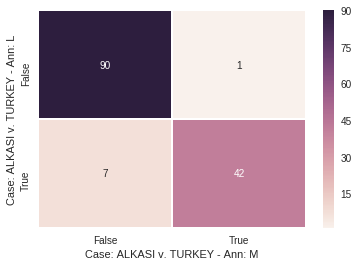

Kohen-'s Kappa Ann: L - Ann: C: 0.84
Observed Agreement: 92.86%


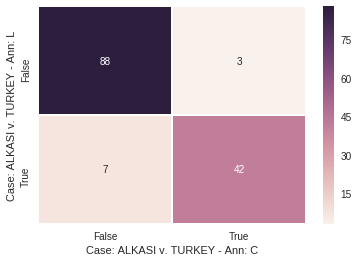

Kohen-'s Kappa Ann: M - Ann: C: 0.8011834319526627
Observed Agreement: 91.43%


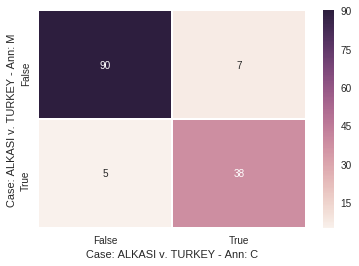

In [87]:
def get_argumentative_sentences(document):
    return [sentence.has_label for sentence in document.sentences]

show_metrics.show_krippendorff_alpha([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
show_metrics.show_fleiss_kappa([get_argumentative_sentences(doc)
                                      for doc in all_files.values()])
for doc1, doc2 in document_pairs:
    labels1 = get_argumentative_sentences(doc1)
    labels2 = get_argumentative_sentences(doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

----
## Token level comparison

### Identification

Kappa agreement using labels `Args` vs `Non-Arg`.

Fleiss Kappa: 0.0032952139025370733


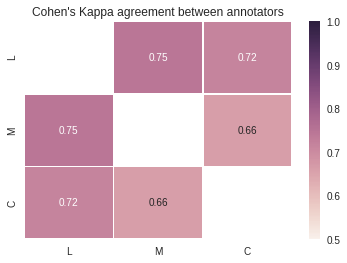

In [90]:
def get_argumentative_words(labels):
    return ['Arg' if x != 'O' else 'O' for x in labels]

# show_metrics.show_krippendorff_alpha(
#     [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_fleiss_kappa(
    [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs, process_function=get_argumentative_words)

Fleiss Kappa: 0.0032952139025370733
Kohen-'s Kappa Ann: L - Ann: M: 0.7450505193513197
Observed Agreement: 87.22%


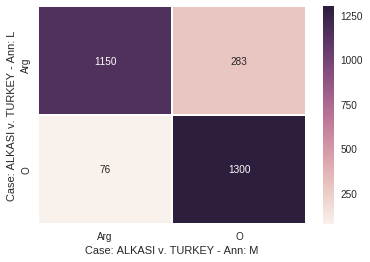

Kohen-'s Kappa Ann: L - Ann: C: 0.7154539694373859
Observed Agreement: 85.76%


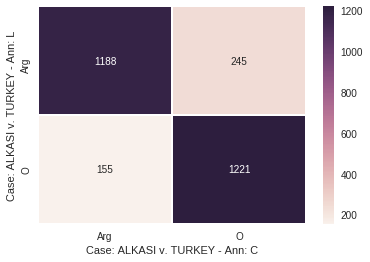

Kohen-'s Kappa Ann: M - Ann: C: 0.6627726509799823
Observed Agreement: 83.23%


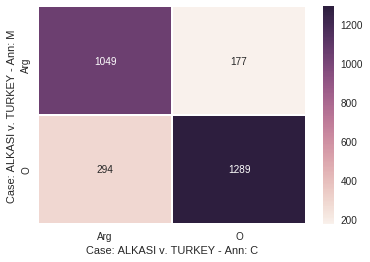

In [22]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_argumentative_words(labels1)
    labels2 = get_argumentative_words(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

----
### Classification

Kappa agreement using labels `claim`, `major-claim` and `premise`

Fleiss Kappa: 0.0004164871732768387


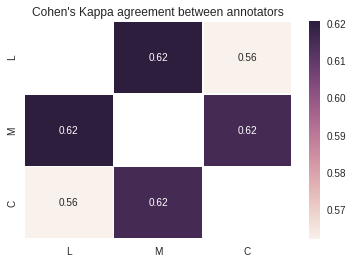

In [85]:
# show_metrics.show_krippendorff_alpha(
#     [get_argumentative_words(doc.get_word_label_list()[1]) for doc in all_files.values()],
#     label_names=['Arg', 'O'])
show_metrics.show_fleiss_kappa(
    [doc.get_word_label_list() for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs)

Fleiss Kappa: 0.0004164871732768387
Kohen-'s Kappa Ann: L - Ann: M: 0.6204455731646765
Observed Agreement: 76.36%


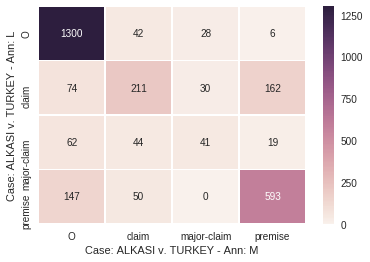

Kohen-'s Kappa Ann: L - Ann: C: 0.5621032080482211
Observed Agreement: 72.41%


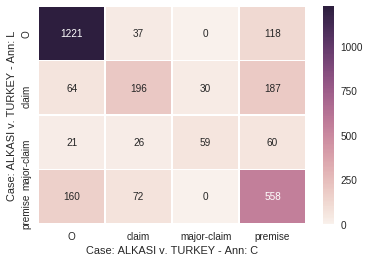

Kohen-'s Kappa Ann: M - Ann: C: 0.6154574663127527
Observed Agreement: 76.97%


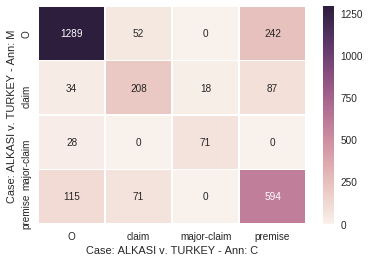

In [23]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

Kappa agreement using only labels `claim` and `premise`

Fleiss Kappa: 0.004118755050439442


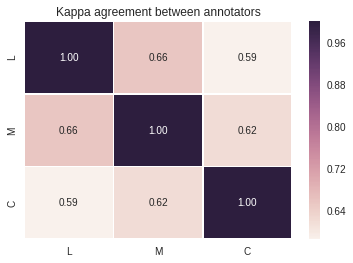

In [72]:
def get_simplified_labels(labels):
    return [x if x != 'major-claim' else 'claim' for x in labels]

# show_metrics.show_krippendorff_alpha(
#     [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()],
#     label_names=['Arg', 'O'])
show_metrics.show_fleiss_kappa(
    [get_simplified_labels(doc.get_word_label_list()[1]) for doc in all_files.values()])
show_metrics.show_general_agreement(document_pairs, process_function=get_simplified_labels)

Fleiss Kappa: 0.004118755050439442
Kohen-'s Kappa Ann: L - Ann: M: 0.6553943977235748
Observed Agreement: 79.00%


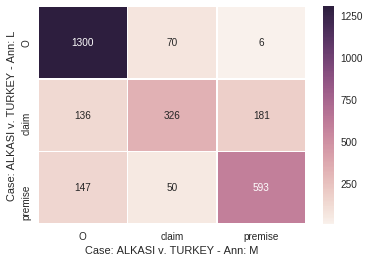

Kohen-'s Kappa Ann: L - Ann: C: 0.5856264881150832
Observed Agreement: 74.40%


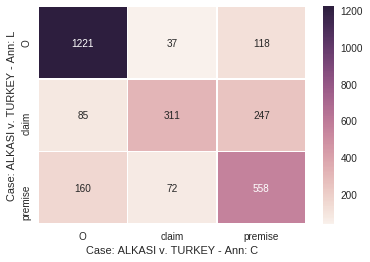

Kohen-'s Kappa Ann: M - Ann: C: 0.6210520739433395
Observed Agreement: 77.61%


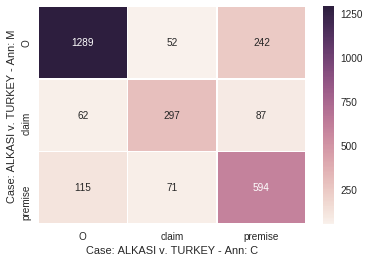

In [24]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = read_annotations.get_labels(doc1, doc2)
    labels1 = get_simplified_labels(labels1)
    labels2 = get_simplified_labels(labels2)
    show_metrics.show_kappa(labels1, labels2, doc1.identifier, doc2.identifier)
    show_metrics.show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

## Qualitative error analysis

In [25]:
def sample_sentences(doc1, doc2, label1, label2, tolerance=0):
    """Samples sentences where label1 was confused with label2 in
    doc1 and doc2 respectively.
    """
    total_errors = 0
    for sentence1, sentence2 in zip(doc1.sentences, doc2.sentences):
        indices1 = [i for i, x in enumerate(sentence1.labels) if x == label1]
        if len(indices1) == 0:
            continue
        indices2 = [i for i, x in enumerate(sentence2.labels) if x == label2]
        if len(indices2) == 0 or len(set(indices1).intersection(indices2)) < tolerance:
            continue
        total_errors += len(set(indices1).intersection(indices2))
        # Print both sentences
        printmd(sentence1.pretty_print(styles=STYLES))
        printmd(sentence2.pretty_print(styles=STYLES))
        printmd('---')
    print('TOTAL ERRORS:', total_errors)

Examples labeled as `premise` in one document and as `O` in the other

In [26]:
document_pairs

[(Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: M),
 (Case: ALKASI v. TURKEY - Ann: L, Case: ALKASI v. TURKEY - Ann: C),
 (Case: ALKASI v. TURKEY - Ann: M, Case: ALKASI v. TURKEY - Ann: C)]

In [27]:
sample_sentences(document_pairs[2][0], document_pairs[2][1], 'O', 'premise', tolerance=1)

Its general aim , in this second aspect , is to protect individuals who have been acquitted of a criminal charge , or in respect of whom criminal proceedings have been discontinued , from being treated by public officials and authorities as though they are in fact guilty of the offence charged . 

Its general aim , in this second aspect , is to `protect` `individuals` `who` `have` `been` `acquitted` `of` `a` `criminal` `charge` `,` `or` `in` `respect` `of` `whom` `criminal` `proceedings` `have` `been` `discontinued` `,` `from` `being` `treated` `by` `public` `officials` `and` `authorities` `as` `though` `they` `are` `in` `fact` `guilty` `of` `the` `offence` `charged` . 

---

`The` `second` `aspect` `of` `the` `protection` `afforded` `by` `Article` `6` `§` `2` `requires` `that` a `person` `must` `be` `treated` `in` `a` `manner` `that` `is` `consistent` `with` `his` `or` `her` `innocence` `after` `the` `conclusion` `of` `criminal` `proceedings` `which` `have` `terminated` in `an` `acquittal` `or` `discontinuation` `(` `ibid.` `,` `§` `103` ) . 

The second aspect of the protection afforded by Article 6 § 2 requires that a `person` `must` `be` `treated` `in` `a` `manner` `that` `is` `consistent` `with` `his` `or` `her` `innocence` `after` `the` `conclusion` `of` `criminal` `proceedings` `which` `have` `terminated` in `an` `acquittal` `or` `discontinuation` `(` `ibid.` `,` `§` `103` `)` . 

---

Such `a` `link` `is` `likely` `to` `be` `present` `,` `for` `example` `,` `where` `the` `subsequent` `proceedings` `require` `examination` `of` `the` `outcome` `of` `the` `prior` `criminal` `proceedings` `and` `,` `in` `particular` `,` `where` `they` `oblige` `the` `court` `to` `analyse` `the` `criminal` `judgment` `,` `to` `engage` `in` `a` `review` `or` `evaluation` `of` `the` `evidence` `in` `the` `criminal` `file` `,` `to` `assess` `the` `applicant` `’` `s` `participation` `in` `some` `or` `all` `of` `the` `events` `leading` `to` `the` `criminal` `charge` `,` `or` `to` `comment` `on` `the` `subsisting` `indications` `of` `the` `applicant` `’` `s` `possible` `guilt` . 

`Such` `a` `link` `is` `likely` `to` `be` `present` `,` `for` `example` `,` `where` `the` `subsequent` `proceedings` `require` `examination` `of` `the` `outcome` `of` `the` `prior` `criminal` `proceedings` `and` `,` `in` `particular` `,` `where` `they` `oblige` `the` `court` `to` `analyse` `the` `criminal` `judgment` `,` `to` `engage` `in` `a` `review` `or` `evaluation` `of` `the` `evidence` `in` `the` `criminal` `file` `,` `to` `assess` `the` `applicant` `’` `s` `participation` `in` `some` `or` `all` `of` `the` `events` `leading` `to` `the` `criminal` `charge` `,` `or` `to` `comment` `on` `the` `subsisting` `indications` `of` `the` `applicant` `’` `s` `possible` `guilt` `.` 

---

( see `Allen` `,` `cited` `above` `,` `§` `104` ) . 

`(` `see` `Allen` `,` `cited` `above` `,` `§` `104` `)` . 

---

In `Allen` `(` `ibid.` `,` `§` `125` `)` , `the` `Grand` `Chamber` `noted` `that` `there` `was` `no` `single` `approach` `to` `ascertaining` `the` `circumstances` `in` `which` `the` `second` `aspect` `of` `Article` `6` `§` `2` `would` `be` `violated` `in` `the` `context` `of` `proceedings` `following` `the` `conclusion` `of` `criminal` `proceedings` . 

`In` `Allen` `(` `ibid.` `,` `§` `125` `)` `,` `the` `Grand` `Chamber` `noted` `that` `there` `was` `no` `single` `approach` `to` `ascertaining` `the` `circumstances` `in` `which` `the` `second` `aspect` `of` `Article` `6` `§` `2` `would` `be` `violated` `in` `the` `context` `of` `proceedings` `following` `the` `conclusion` `of` `criminal` `proceedings` . 

---

In the application of the above principles to the present case , the Court will have regard to the applicability of Article 6 § 2 to the impugned decision of the Bakırköy Labour Court by determining whether a link existed between the criminal proceedings and the subsequent labour proceedings . 

In the application of the above principles to the present case , `the` `Court` `will` `have` `regard` `to` `the` `applicability` `of` `Article` `6` `§` `2` `to` `the` `impugned` `decision` `of` `the` `Bakırköy` `Labour` `Court` `by` `determining` `whether` `a` `link` `existed` `between` `the` `criminal` `proceedings` `and` `the` `subsequent` `labour` `proceedings` . 

---

Provided that a link is found to exist , the Court will have regard to whether the reasons given in the Bakırköy Labour Court ’ s decision , or the language in which it set out its reasoning , allowed doubt to be cast on the presumption of the applicant ’ s innocence , when she had not been proved guilty according to law . 

Provided that a link is found to exist , `the` `Court` `will` `have` `regard` `to` `whether` the `reasons` `given` `in` `the` `Bakırköy` `Labour` `Court` `’` `s` `decision` `,` `or` `the` `language` `in` `which` `it` `set` `out` `its` `reasoning` `,` `allowed` `doubt` `to` `be` `cast` `on` `the` `presumption` `of` `the` `applicant` `’` `s` `innocence` `,` `when` `she` `had` `not` `been` `proved` `guilty` `according` `to` `law` . 

---

The Court notes that the parties do not dispute the fact that the termination of the applicant ’ s employment was directly related to the events leading to the criminal proceedings . 

The Court notes that `the` `parties` `do` `not` `dispute` `the` `fact` `that` `the` `termination` `of` `the` `applicant` `’` `s` `employment` `was` `directly` `related` `to` `the` `events` `leading` `to` `the` `criminal` `proceedings` . 

---

The Court observes at the outset that the nature of the labour court ’ s task was to assess whether the termination of the applicant ’ s employment had been justified , and whether the applicant should have received notice and severance pay upon termination of her employment contract . 

The Court observes at the outset that `the` `nature` `of` `the` `labour` `court` `’` `s` `task` `was` `to` `assess` `whether` the `termination` `of` `the` `applicant` `’` `s` `employment` `had` `been` `justified` `,` `and` `whether` the `applicant` `should` `have` `received` `notice` `and` `severance` `pay` `upon` `termination` `of` `her` `employment` `contract` . 

---

The Court recalls in that respect that `even` `exoneration` `from` `criminal` `responsibility` `does` `not` `,` `as` `such` `,` `preclude` `the` `establishment` `of` `civil` `or` `other` `forms` `of` `liability` `arising` `out` `of` `the` `same` `facts` `on` `the` `basis` `of` `a` `less` `strict` `burden` `of` `proof` ( see , for example , `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ `(` `see` `,` `for` `example` `,` `Ringvold` `v.` `Norway` `,` `no` `.` 

---

`34964/97` `,` `§` `38` `,` `ECHR` `2003‑II` , and `Vella` `v.` `Malta` `,` `no` `.` 

`34964/97` `,` `§` `38` `,` `ECHR` `2003‑II` `,` `and` `Vella` `v.` `Malta` `,` `no` `.` 

---

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , `the` `national` `courts` `in` `the` `subsequent` `proceedings` `need` `to` `stay` `within` `the` `bounds` `of` `a` `civil` `forum` `and` `refrain` `from` `suggesting` `criminal` `characterization` `of` `the` `applicant` `’` `s` `conduct` ( see , inter alia , `Teodor` `v.` `Romania` `,` `no` `.` 

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , `the` `national` `courts` `in` `the` `subsequent` `proceedings` `need` `to` `stay` `within` `the` `bounds` `of` `a` `civil` `forum` `and` `refrain` `from` `suggesting` `criminal` `characterization` `of` `the` `applicant` `’` `s` `conduct` `(` `see` `,` `inter` `alia` `,` `Teodor` `v.` `Romania` `,` `no` `.` 

---

`46878/06` `,` `§` `44` `,` `4` `June` `2013` , and `N.A` . 

`46878/06` `,` `§` `44` `,` `4` `June` `2013` `,` `and` `N.A` . 

---

`27473/11` `,` `§` `46` `,` `18` `December` `2014` ) . 

`27473/11` `,` `§` `46` `,` `18` `December` `2014` `)` . 

---

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` `,` `and` `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` `,` `and` `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` `,` `when` `in` `fact` `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

---

The Court notes in this context that it has already found that `the` `use` `as` `evidence` `for` `a` `criminal` `conviction` `of` `statements` `given` `by` `the` `accused` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `may` `amount` `to` `a` `violation` `of` `Article` `6` `§` `1` `of` `the` `Convention` ( see `Salduz` `v.` `Turkey` `[` `GC` `]` `,` `no` `.` 

The Court notes in this context that `it` `has` `already` `found` `that` `the` `use` `as` `evidence` `for` `a` `criminal` `conviction` `of` `statements` `given` `by` `the` `accused` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `may` `amount` `to` `a` `violation` `of` `Article` `6` `§` `1` `of` `the` `Convention` `(` `see` `Salduz` `v.` `Turkey` `[` `GC` `]` `,` `no` `.` 

---

`36391/02` `,` `§§` `56-62` `,` `ECHR` `2008` ) . 

`36391/02` `,` `§§` `56-62` `,` `ECHR` `2008` `)` . 

---

`into` `committing` `the` `crime` `,` `and` `that` `the` `labour` `court` `explicitly` `stated` `that` `it` `had` `examined` `the` `entire` `criminal` `investigation` `file` ( see paragraph 14 above ) . 

`into` `committing` `the` `crime` `,` `and` `that` `the` `labour` `court` `explicitly` `stated` `that` `it` `had` `examined` `the` `entire` `criminal` `investigation` `file` `(` `see` `paragraph` `14` `above` `)` . 

---

TOTAL ERRORS: 242


In [61]:
sample_sentences(document_pairs[1][0], document_pairs[1][1], 'premise', 'O', tolerance=3)

`Viewed` as `a` `procedural` `guarantee` `in` `the` `context` `of` `a` `criminal` `trial` `itself` `,` `the` `presumption` `of` `innocence` `imposes` `requirements` `in` `respect` `of` `,` `inter` `alia` `,` `the` `burden` `of` `proof` `,` `legal` `presumptions` `of` `fact` `and` `law` `,` `the` `privilege` `against` `self-incrimination` `,` `pre-trial` `publicity` `and` `premature` `expressions` `,` `by` `the` `trial` `court` `or` `by` `other` `public` `officials` `,` `of` `a` `defendant` `’` `s` `guilt` `(` `see` `Allen` `v.` `the` `United` `Kingdom` `[` `GC` `]` `,` `no` `.` 

Viewed as a procedural guarantee in the context of a criminal trial itself , `the` `presumption` `of` `innocence` `imposes` `requirements` `in` `respect` `of` `,` `inter` `alia` `,` `the` `burden` `of` `proof` `,` `legal` `presumptions` `of` `fact` `and` `law` `,` `the` `privilege` `against` `self-incrimination` `,` `pre-trial` `publicity` `and` `premature` `expressions` `,` `by` `the` `trial` `court` `or` `by` `other` `public` `officials` `,` `of` `a` `defendant` `’` `s` `guilt` `(` `see` `Allen` `v.` `the` `United` `Kingdom` `[` `GC` `]` `,` `no` `.` 

---

`Without` `protection` `to` `ensure` `respect` `for` `the` `acquittal` `or` `the` `discontinuation` `decision` `in` `any` `other` `proceedings` `,` `the` `fair` `trial` `guarantees` `of` `Article` `6` `§` `2` `could` `risk` `becoming` `theoretical` `and` `illusory` `(` `ibid.` `,` `§` `94` ) . 

Without protection to ensure respect for the acquittal or the discontinuation decision in any other proceedings , the fair trial guarantees of Article 6 § 2 could risk becoming theoretical and illusory ( ibid. , § 94 ) . 

---

`The` `extension` `of` `the` `protection` `of` `Article` `6` `§` `2` `to` `subsequent` `non-criminal` `proceedings` `constitutes` `an` `important` `safeguard` `for` `the` `person` `’` `s` `established` innocence `in` `relation` `to` `any` `charge` `not` `proven` `.` 

The extension of the protection of Article 6 § 2 to subsequent non-criminal proceedings constitutes an important safeguard for the person ’ s established innocence in relation to any charge not proven . 

---

The Court notes that the parties do not dispute the fact that `the` `termination` `of` `the` `applicant` `’` `s` `employment` `was` `directly` `related` `to` `the` `events` `leading` `to` `the` `criminal` `proceedings` . 

The Court notes that the parties do not dispute the fact that the termination of the applicant ’ s employment was directly related to the events leading to the criminal proceedings . 

---

__It__ __could__ , as `a` `civil` `court` , __reach__ a __different__ __conclusion__ __from__ __the__ __criminal__ __courts__ __by__ __establishing__ __independently__ __the__ __facts__ __of__ __the__ __case__ __with__ __regard__ __to__ __the__ __applicant__ __’__ __s__ __conduct__ . 

It could , as a civil court , reach a different conclusion from the criminal courts by establishing independently the facts of the case with regard to the applicant ’ s conduct . 

---

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ `(` `see` `,` `for` `example` `,` `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that `even` `exoneration` `from` `criminal` `responsibility` `does` `not` `,` `as` `such` `,` `preclude` `the` `establishment` `of` `civil` `or` `other` `forms` `of` `liability` `arising` `out` `of` `the` `same` `facts` `on` `the` `basis` `of` `a` `less` `strict` `burden` `of` `proof` ( see , for example , `Ringvold` `v.` `Norway` `,` `no` `.` 

---

However , in order to comply with `the` `right` `guaranteed` `under` `Article` `6` `§` `2` `of` `the` `Convention` , __the__ __national__ __courts__ __in__ __the__ __subsequent__ __proceedings__ __need__ __to__ __stay__ __within__ __the__ __bounds__ __of__ __a__ __civil__ __forum__ __and__ __refrain__ __from__ __suggesting__ __criminal__ __characterization__ __of__ __the__ __applicant__ __’__ __s__ __conduct__ `(` `see` `,` `inter` `alia` `,` `Teodor` `v.` `Romania` `,` `no` `.` 

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , `the` `national` `courts` `in` `the` `subsequent` `proceedings` `need` `to` `stay` `within` `the` `bounds` `of` `a` `civil` `forum` `and` `refrain` `from` `suggesting` `criminal` `characterization` `of` `the` `applicant` `’` `s` `conduct` ( see , inter alia , `Teodor` `v.` `Romania` `,` `no` `.` 

---

The court notes that , although `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` , `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` , and `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` `,` `when` `in` `fact` `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

The court notes that , `although` `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` `,` `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` `,` `and` `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

---

TOTAL ERRORS: 131


In [58]:
sample_sentences(document_pairs[1][0], document_pairs[1][1], 'claim', 'premise', tolerance=1)

__“__ __Everyone__ __charged__ __with__ __a__ __criminal__ __offence__ __shall__ __be__ __presumed__ __innocent__ __until__ __proved__ __guilty__ __according__ __to__ __law__ __.__ __”__ 

`“` `Everyone` `charged` `with` `a` `criminal` `offence` `shall` `be` `presumed` `innocent` `until` `proved` `guilty` `according` `to` `law` . ” 

---

However , in all cases and regardless of which approach applied , __the__ __language__ __used__ __by__ __a__ __decision__ __maker__ __would__ __be__ __of__ __critical__ __importance__ __in__ __assessing__ __the__ __compatibility__ __of__ __the__ __decision__ __and__ __its__ __reasoning__ __with__ __Article__ __6__ __§__ __2__ `(` `ibid.` `,` `§§` `125` `and` `126` ) . 

However , in all cases and regardless of which approach applied , `the` `language` `used` `by` `a` `decision` `maker` `would` `be` `of` `critical` `importance` `in` `assessing` `the` `compatibility` `of` `the` `decision` `and` `its` `reasoning` `with` `Article` `6` `§` `2` `(` `ibid.` `,` `§§` `125` `and` `126` ) . 

---

In other words , __the__ __Bakırköy__ __Labour__ __Court__ , as `a` `civil` `court` `not` `bound` `by` `the` `findings` `or` `result` `of` `the` `criminal` `proceedings` , __was__ __at__ __liberty__ __to__ __determine__ __the__ __dispute__ __from__ __a__ __labour__ __law__ __perspective__ . 

In other words , `the` `Bakırköy` `Labour` `Court` `,` as `a` `civil` `court` `not` `bound` `by` `the` `findings` `or` `result` `of` `the` `criminal` `proceedings` `,` `was` `at` `liberty` `to` `determine` `the` `dispute` `from` `a` `labour` `law` `perspective` . 

---

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ `(` `see` `,` `for` `example` `,` `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that `even` `exoneration` `from` `criminal` `responsibility` `does` `not` `,` `as` `such` `,` `preclude` `the` `establishment` `of` `civil` `or` `other` `forms` `of` `liability` `arising` `out` `of` `the` `same` `facts` `on` `the` `basis` `of` `a` `less` `strict` `burden` `of` `proof` ( see , for example , `Ringvold` `v.` `Norway` `,` `no` `.` 

---

However , in order to comply with `the` `right` `guaranteed` `under` `Article` `6` `§` `2` `of` `the` `Convention` , __the__ __national__ __courts__ __in__ __the__ __subsequent__ __proceedings__ __need__ __to__ __stay__ __within__ __the__ __bounds__ __of__ __a__ __civil__ __forum__ __and__ __refrain__ __from__ __suggesting__ __criminal__ __characterization__ __of__ __the__ __applicant__ __’__ __s__ __conduct__ `(` `see` `,` `inter` `alia` `,` `Teodor` `v.` `Romania` `,` `no` `.` 

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , `the` `national` `courts` `in` `the` `subsequent` `proceedings` `need` `to` `stay` `within` `the` `bounds` `of` `a` `civil` `forum` `and` `refrain` `from` `suggesting` `criminal` `characterization` `of` `the` `applicant` `’` `s` `conduct` ( see , inter alia , `Teodor` `v.` `Romania` `,` `no` `.` 

---

The Court notes in this context that it has already found that __the__ __use__ __as__ __evidence__ __for__ __a__ __criminal__ __conviction__ __of__ __statements__ __given__ __by__ __the__ __accused__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __may__ __amount__ __to__ __a__ __violation__ __of__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ `(` `see` `Salduz` `v.` `Turkey` `[` `GC` `]` `,` `no` `.` 

The Court notes in this context that it has already found that `the` `use` `as` `evidence` `for` `a` `criminal` `conviction` `of` `statements` `given` `by` `the` `accused` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `may` `amount` `to` `a` `violation` `of` `Article` `6` `§` `1` `of` `the` `Convention` ( see `Salduz` `v.` `Turkey` `[` `GC` `]` `,` `no` `.` 

---

TOTAL ERRORS: 162


In [59]:
sample_sentences(document_pairs[1][0], document_pairs[1][1], 'premise', 'claim', tolerance=2)

`Any` `statement` `or` `reasoning` `by` `a` `civil` `court` `calling` `into` `question` `the` `applicant` `’` `s` `established` `innocence` `would` `be` `incompatible` `with` `the` `requirements` `of` `Article` `6` `§` `2` . 

__Any__ __statement__ __or__ __reasoning__ __by__ __a__ __civil__ __court__ __calling__ __into__ __question__ __the__ __applicant__ __’__ __s__ __established__ __innocence__ __would__ __be__ __incompatible__ __with__ __the__ __requirements__ __of__ __Article__ __6__ __§__ __2__ . 

---

Thus , the facts of the case seem to indicate that `the` `statements` `given` `by` `the` `applicant` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `were` `relied` `on` `by` `the` `labour` `court` , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that __reliance__ __by__ __a__ __court__ __on__ __such__ __statements__ __in__ __civil__ __proceedings__ __may__ __raise__ __an__ __issue__ __under__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ . 

---

TOTAL ERRORS: 50


In [60]:
sample_sentences(document_pairs[1][0], document_pairs[1][1], 'O', 'claim', tolerance=2)

Thus , the facts of the case seem to indicate that `the` `statements` `given` `by` `the` `applicant` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `were` `relied` `on` `by` `the` `labour` `court` , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that __reliance__ __by__ __a__ __court__ __on__ __such__ __statements__ __in__ __civil__ __proceedings__ __may__ __raise__ __an__ __issue__ __under__ __Article__ __6__ __§__ __1__ __of__ __the__ __Convention__ . 

---

However , having regard to the fact that the labour court ’ s reasoning and the wording used violated the applicant ’ s right to presumption of innocence , the Court does not find it necessary to also assess if the labour court in reaching its conclusion relied on evidence in violation of the right to a fair trial . 

However , having regard to the fact that __the__ __labour__ __court__ __’__ __s__ __reasoning__ __and__ __the__ __wording__ __used__ __violated__ __the__ __applicant__ __’__ __s__ __right__ __to__ __presumption__ __of__ __innocence__ , the Court ***does*** ***not*** ***find*** ***it*** ***necessary*** ***to*** ***also*** ***assess*** ***if*** ***the*** ***labour*** ***court*** ***in*** ***reaching*** ***its*** ***conclusion*** ***relied*** ***on*** ***evidence*** ***in*** ***violation*** ***of*** ***the*** ***right*** ***to*** ***a*** ***fair*** ***trial*** . 

---

TOTAL ERRORS: 42


In [62]:
sample_sentences(document_pairs[1][0], document_pairs[1][1], 'O', 'major-claim', tolerance=2)

However , having regard to the fact that the labour court ’ s reasoning and the wording used violated the applicant ’ s right to presumption of innocence , the Court does not find it necessary to also assess if the labour court in reaching its conclusion relied on evidence in violation of the right to a fair trial . 

However , having regard to the fact that __the__ __labour__ __court__ __’__ __s__ __reasoning__ __and__ __the__ __wording__ __used__ __violated__ __the__ __applicant__ __’__ __s__ __right__ __to__ __presumption__ __of__ __innocence__ , the Court ***does*** ***not*** ***find*** ***it*** ***necessary*** ***to*** ***also*** ***assess*** ***if*** ***the*** ***labour*** ***court*** ***in*** ***reaching*** ***its*** ***conclusion*** ***relied*** ***on*** ***evidence*** ***in*** ***violation*** ***of*** ***the*** ***right*** ***to*** ***a*** ***fair*** ***trial*** . 

---

TOTAL ERRORS: 28
